I0000 00:00:1751534683.887785   39068 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1751534683.890865   39352 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 25.1.4-arch1.2), renderer: AMD Radeon Graphics (radeonsi, renoir, ACO, DRM 3.63, 6.15.4-arch2-1)
W0000 00:00:1751534683.896709   39343 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751534683.913313   39341 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


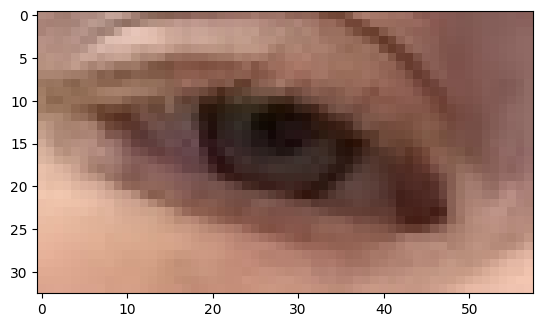

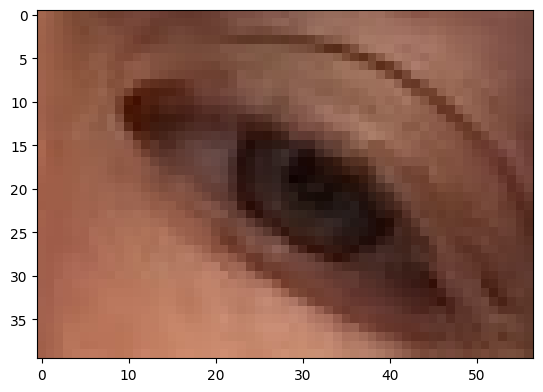

Eyes extracted and saved in 'eyes' folder.


In [8]:
import cv2
from matplotlib import pyplot as plt
import mediapipe as mp
import os

# Load the image
image = cv2.imread(
    "/home/parvez/reps/project/dataset/1/00185502.jpg"
)  # Replace with your image file name
h, w, _ = image.shape

# Initialize Mediapipe FaceMesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=True, max_num_faces=1, refine_landmarks=True
)

# Convert image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = face_mesh.process(image_rgb)

# Landmark indices for eyes (Mediapipe FaceMesh uses 478 points in refine_landmarks=True)
LEFT_EYE_LANDMARKS = [33, 133, 159, 145, 153, 154, 155]
RIGHT_EYE_LANDMARKS = [362, 263, 386, 374, 380, 381, 382]


def extract_eye(landmarks, indices):
    x_list = [int(landmarks.landmark[i].x * w) for i in indices]
    y_list = [int(landmarks.landmark[i].y * h) for i in indices]
    xmin, xmax = min(x_list), max(x_list)
    ymin, ymax = min(y_list), max(y_list)
    padding = 10
    xmin = max(0, xmin - padding)
    xmax = min(w, xmax + padding)
    ymin = max(0, ymin - padding)
    ymax = min(h, ymax + padding)
    return image[ymin:ymax, xmin:xmax]



if results.multi_face_landmarks:
    face_landmarks = results.multi_face_landmarks[0]

    left_eye_img = extract_eye(face_landmarks, LEFT_EYE_LANDMARKS)
    right_eye_img = extract_eye(face_landmarks, RIGHT_EYE_LANDMARKS)

    plt.imshow(cv2.cvtColor(left_eye_img, cv2.COLOR_BGR2RGB))
    plt.show()
    plt.imshow(cv2.cvtColor(right_eye_img, cv2.COLOR_BGR2RGB))
    plt.show()

    print("Eyes extracted and saved in 'eyes' folder.")
else:
    print("No face detected.")

I0000 00:00:1751534923.652417   39068 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1751534923.656547   39683 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 25.1.4-arch1.2), renderer: AMD Radeon Graphics (radeonsi, renoir, ACO, DRM 3.63, 6.15.4-arch2-1)
W0000 00:00:1751534923.660577   39676 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751534923.676426   39677 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


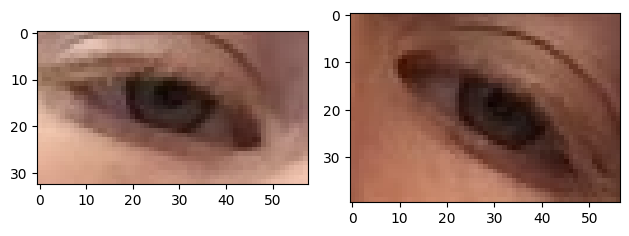

In [13]:
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt

image = cv2.imread("/home/parvez/reps/project/dataset/1/00185502.jpg")
h, w, _ = image.shape

mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
	static_image_mode=True, max_num_faces=1, refine_landmarks=True
)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = face_mesh.process(image_rgb)

LEFT = [33, 133, 159, 145, 153, 154, 155]
RIGHT = [362, 263, 386, 374, 380, 381, 382]

if results.multi_face_landmarks:
	lms = results.multi_face_landmarks[0].landmark

	lx = [int(lms[i].x * w) for i in LEFT]
	ly = [int(lms[i].y * h) for i in LEFT]
	left_eye = image[
		max(min(ly) - 10, 0) : min(max(ly) + 10, h),
		max(min(lx) - 10, 0) : min(max(lx) + 10, w),
	]

	rx = [int(lms[i].x * w) for i in RIGHT]
	ry = [int(lms[i].y * h) for i in RIGHT]
	right_eye = image[
		max(min(ry) - 10, 0) : min(max(ry) + 10, h),
		max(min(rx) - 10, 0) : min(max(rx) + 10, w),
	]

	plt.subplot(1, 2, 1)
	plt.imshow(cv2.cvtColor(left_eye, cv2.COLOR_BGR2RGB))
	plt.subplot(1, 2, 2)
	plt.imshow(cv2.cvtColor(right_eye, cv2.COLOR_BGR2RGB))
	plt.tight_layout()
else:
	print("No face detected.")

In [25]:
from pathlib import Path
import cv2
import mediapipe as mp


dataset_path = Path("/home/parvez/reps/project/dataset")

mp_face_mesh = mp.solutions.face_mesh # type: ignore
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=True, max_num_faces=1, refine_landmarks=True
)
LEFT = [33, 133, 159, 145, 153, 154, 155]
RIGHT = [362, 263, 386, 374, 380, 381, 382]

cnt = 0
for img_path in dataset_path.glob("1/*.jpg"):
    print(img_path)
    cnt+=1
    img = cv2.imread(str(img_path), cv2.IMREAD_COLOR)

    results = face_mesh.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    if results.multi_face_landmarks:
        lms = results.multi_face_landmarks[0].landmark

        lx = [int(lms[i].x * img.shape[1]) for i in LEFT]
        ly = [int(lms[i].y * img.shape[0]) for i in LEFT]
        left_eye = img[
            max(min(ly) - 10, 0) : min(max(ly) + 10, img.shape[0]),
            max(min(lx) - 10, 0) : min(max(lx) + 10, img.shape[1]),
        ]

        rx = [int(lms[i].x * img.shape[1]) for i in RIGHT]
        ry = [int(lms[i].y * img.shape[0]) for i in RIGHT]
        right_eye = img[
            max(min(ry) - 10, 0) : min(max(ry) + 10, img.shape[0]),
            max(min(rx) - 10, 0) : min(max(rx) + 10, img.shape[1]),
        ]

        if left_eye.size != 0:
            cv2.imwrite(f"/home/parvez/reps/project/dataset/1_eyes/{cnt:08d}_left.jpg", left_eye)
        else:
            print(f"Warning: left_eye is empty for {img_path}")

        if right_eye.size != 0:
            cv2.imwrite(f"/home/parvez/reps/project/dataset/1_eyes/{cnt:08d}_right.jpg", right_eye)
        else:
            print(f"Warning: right_eye is empty for {img_path}")

I0000 00:00:1751536868.952109   39068 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1751536868.960366   42041 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 25.1.4-arch1.2), renderer: AMD Radeon Graphics (radeonsi, renoir, ACO, DRM 3.63, 6.15.4-arch2-1)
W0000 00:00:1751536868.970333   42029 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751536869.006923   42030 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


/home/parvez/reps/project/dataset/1/00000017.jpg
/home/parvez/reps/project/dataset/1/00000018.jpg
/home/parvez/reps/project/dataset/1/00000019.jpg
/home/parvez/reps/project/dataset/1/00000020.jpg
/home/parvez/reps/project/dataset/1/00000021.jpg
/home/parvez/reps/project/dataset/1/00000022.jpg
/home/parvez/reps/project/dataset/1/00000023.jpg
/home/parvez/reps/project/dataset/1/00000024.jpg
/home/parvez/reps/project/dataset/1/00000025.jpg
/home/parvez/reps/project/dataset/1/00000026.jpg
/home/parvez/reps/project/dataset/1/00000027.jpg
/home/parvez/reps/project/dataset/1/00000028.jpg
/home/parvez/reps/project/dataset/1/00000029.jpg
/home/parvez/reps/project/dataset/1/00000030.jpg
/home/parvez/reps/project/dataset/1/00000031.jpg
/home/parvez/reps/project/dataset/1/00000032.jpg
/home/parvez/reps/project/dataset/1/00000033.jpg
/home/parvez/reps/project/dataset/1/00000034.jpg
/home/parvez/reps/project/dataset/1/00000035.jpg
/home/parvez/reps/project/dataset/1/00000036.jpg
/home/parvez/reps/pr